# Feed Forward Networks (live coding)

In [154]:
import numpy as np
from sklearn.datasets import make_classification, make_moons, make_blobs  # Toy data

import matplotlib.pyplot as plt

## Data



In [155]:
def plot_classification(X, y, classifier=None):
  plt.figure(figsize=(4, 4), dpi=100)
  markers = ['o', 's', 'd']
  for j, label in enumerate(np.unique(y)):
    if X.shape[1] == 2:
      # No pseudo input
      plt.scatter(X[y==label, 0], X[y==label, 1], c=y[y==label], s=40, marker=markers[j], edgecolor='k', cmap='coolwarm', vmin=y.min(), vmax=y.max())
    else:
      # X includes pseudo inputs
      plt.scatter(X[y==label, 1], X[y==label, 2], c=y[y==label], s=40, marker=markers[j], edgecolor='k', cmap='coolwarm', vmin=y.min(), vmax=y.max())
  if classifier is not None:
    # Create a plotting mesh
    a = plt.axis()          # The mesh will adapt plotted data
    XX, YY = np.meshgrid(np.linspace(a[0], a[1], 40),
                        np.linspace(a[2], a[3], 40))
    mesh_points = [np.vstack(XX.ravel()), np.vstack(YY.ravel())]  # Reshape the x and y coordinates to columns
    mesh_points.insert(0, np.ones(mesh_points[0].shape))  # Add pseudo input
    mesh_points = np.concatenate(mesh_points, axis=1)     # Convert to numpy array
    # Run classification
    Z = classifier.predict_proba(mesh_points)
    if Z.shape[1] > 1:
      Z = classifier.predict(mesh_points)
    # Z = np.apply_along_axis(classifier, 1, mesh_points) 
    # Plot, contourf will interpolate the colour between our mesh points
    plt.contourf(XX, YY, Z.reshape(XX.shape), alpha=.5, cmap='coolwarm', zorder=-1)
  plt.tight_layout()
  plt.show()

Let's make some data. *These overwrite each other*

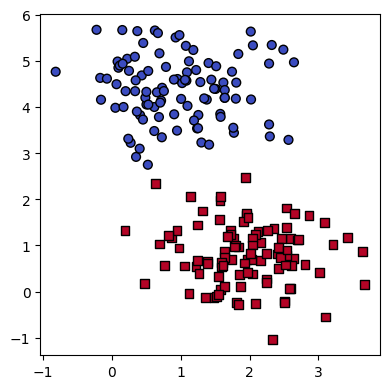

(array([[1.        , 2.59193175, 1.14706863],
        [1.        , 1.7756532 , 1.15670278],
        [1.        , 2.8032241 , 0.5802936 ],
        [1.        , 1.6090616 , 0.61957339],
        [1.        , 2.04921553, 5.33233847]]), array([1, 1, 1, 1, 0]))

In [156]:
X, y = make_blobs(n_samples=200, centers=2, cluster_std=.7, n_features=2, random_state=0)
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1) # Add pseudo input

plot_classification(X, y)
X[:5], y[:5]

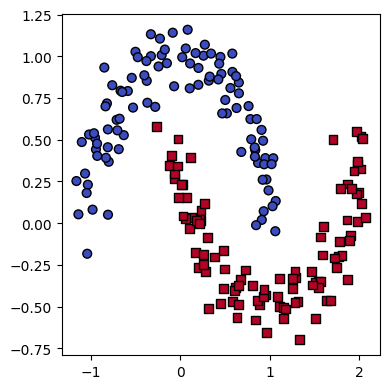

(array([[ 1.        ,  0.79235735,  0.50264857],
        [ 1.        ,  1.63158315, -0.4638967 ],
        [ 1.        , -0.06710927,  0.26776706],
        [ 1.        , -1.04412427, -0.18260761],
        [ 1.        ,  1.76704822, -0.19860987]]), array([0, 1, 1, 0, 1]))

In [157]:
X, y = make_moons(n_samples=200, noise=.1, random_state=0)
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1) # Add pseudo input

plot_classification(X, y)
X[:5], y[:5]

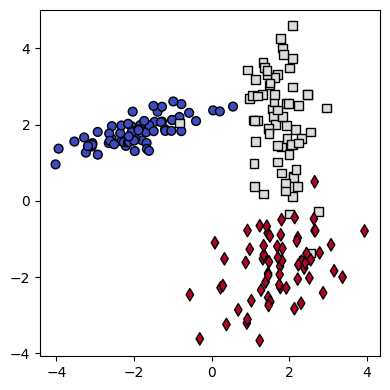

(array([[ 1.        ,  2.00120424,  3.48585849],
        [ 1.        , -1.27565612,  2.07888341],
        [ 1.        ,  2.65445232, -0.77822912],
        [ 1.        ,  0.92692666, -0.77581931],
        [ 1.        , -1.78887301,  1.58891079]]), array([1, 0, 2, 2, 0]))

In [158]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=3, class_sep=1.8,
                           n_clusters_per_class=1, random_state=0)
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1) # Add pseudo input

plot_classification(X, y)
X[:5], y[:5]


# Modelling